In [1]:
import pyspark
import pandas as pd
from pyspark.sql import SQLContext
from pyspark.sql.functions import avg
import pyspark.sql.functions
import os
import findspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,expr, when
from pyspark.sql import functions as sqlf
from pyspark.sql.functions import countDistinct
import numpy as np
from pyspark.sql.types import (
    StringType,
    LongType,
    DoubleType,
    StructField,
    StructType,
    FloatType
)
import matplotlib.pyplot as plt
sc = pyspark.SparkContext()
findspark.init('/home/hadoop/spark/spark-2.2.2-bin-hadoop2.7')
sqlContext = SQLContext(sc)

In [5]:
file_name= "/home/hadoop/venv/airbnb.csv"

In [6]:
df = sqlContext.read.format("csv").option("header","true").option("inferSchema","true").load(file_name)

In [7]:
#평균값으로 열 채워줌
def fill_with_mean(this_df, exclude=set()):
    stats = this_df.agg(*(avg(c).alias(c) for c in this_df.columns if c not in exclude))
    return this_df.na.fill(stats.first().asDict())
df_mean= fill_with_mean(df, ["room_id","host_id","room_type","borough","neighborhood","reviews","accommodates","bedrooms","price","minstay","latitude","longitude","last_modified"])
df_p1 = df_mean.withColumn('total_Score', df_mean.overall_satisfaction + df_mean.reviews * 0.378)

In [8]:
problem1_asc= df_p1.orderBy(["total_score"],ascending=[1,0]).select('room_id', 'host_id', 'total_score')
problem1_des = df_p1.orderBy(["total_score"],ascending=[0,1]).select('room_id', 'host_id', 'total_score')
problem1_asc.toPandas()
problem1_des.toPandas()

,room_id,host_id,total_score
0,66288,324630,149.530000
1,414419,2027295,111.474000
2,1497879,2776892,110.718000
3,31796,119019,103.536000
4,815639,3637081,98.622000
5,916123,3637081,98.622000
6,1136972,1480518,97.232000
7,47521,119019,89.550000
8,1695275,324630,88.294000
9,2776143,324630,84.892000


In [9]:
problem2_avg= df_mean.groupBy('neighborhood').avg('reviews', 'overall_satisfaction', 'price')
problem2_max= df_mean.groupBy('neighborhood').max('reviews', 'price')
problem2_min= df_mean.groupBy('neighborhood').min('reviews', 'price')
problem2_table = (problem2_avg.join(problem2_max,['neighborhood'])).join(problem2_min, ['neighborhood'])
problem2_final = problem2_table.select("neighborhood", "avg(reviews)", "avg(overall_satisfaction)", "avg(price)", "max(reviews)", "min(reviews)", "max(price)", "min(price)")
problem2_asc = problem2_final.orderBy(['neighborhood'],ascending=[1,0])
problem2_asc.toPandas()

,neighborhood,avg(reviews),avg(overall_satisfaction),avg(price),max(reviews),min(reviews),max(price),min(price)
0,Allston,10.314010,4.664463,100.019324,118,0,550.0,20.0
1,Back Bay,11.296820,4.653865,237.515901,283,0,1372.0,41.0
2,Bay Village,10.947368,4.558959,254.157895,47,0,1200.0,81.0
3,Beacon Hill,17.800000,4.630352,215.907317,214,0,849.0,42.0
4,Brighton,13.250000,4.670793,113.955556,152,0,999.0,10.0
5,Charlestown,24.430769,4.761857,228.538462,198,0,1000.0,55.0
6,Chinatown,11.909091,4.669470,254.927273,172,0,600.0,92.0
7,Dorchester,25.000000,4.577677,91.575000,262,0,395.0,30.0
8,Downtown,14.671053,4.663698,241.184211,188,0,1000.0,38.0
9,East Boston,28.531746,4.590960,115.484127,281,0,300.0,35.0


In [10]:
problem3 = df_mean.select('accommodates','bedrooms','reviews','neighborhood','price')

In [11]:
index = expr("""
IF(price <100 AND price >0, "0-100", 
    IF(price >=100 AND price <200, "100-200",
    IF(price >=200 AND price <300, "200-300",
    IF(price >=300 AND price <400, "300-400",
    IF(price >=400 AND price <500, "400-500",
    IF(price >=500 AND price <1000, "500-1000",
    IF(price >=1000 AND price <5000, "1000-5000",-1)))))))""")
problem3_index= problem3.withColumn("Price", index)
problem3_avg = problem3_index.groupBy("price").agg(avg('accommodates').alias("accommodates average")\
                                                   ,avg('bedrooms').alias("bedrooms average")\
                                                   ,sqlf.mean('reviews').alias("reviews average"))
problem3_length = problem3_index.groupBy("Price").count().select('Price', sqlf.col('count').alias('length'))
problem3_nei = problem3_index.groupBy("Price").agg(countDistinct("neighborhood").alias('neighbor list'))


In [12]:
def median(values_list):
    med = np.median(values_list)
    return float(med)
udf_median = sqlf.udf(median, FloatType())
problem3_temp = problem3_index.groupBy("Price")
problem3_med = problem3_temp.agg(udf_median(sqlf.collect_list(col('accommodates'))).alias('accommodates median'),udf_median(sqlf.collect_list(col('bedrooms'))).alias('bedrooms median'),udf_median(sqlf.collect_list(col('reviews'))).alias('reviews median'))
problem3_final = ((problem3_avg.join(problem3_med, ['Price'])).join(problem3_nei, ['Price'])).join(problem3_length, ['Price'])

sort_index=expr( """IF(Price == "0-100", "1",
    IF(Price== "100-200", "2",
    IF(Price == "200-300", "3",
    IF(Price == "300-400", "4",
    IF(Price == "400-500", "5",
    IF(Price == "500-1000", "6",
    IF(Price == "1000-5000", "7",-1)))))))"""
)

problem3_sort = problem3_final.withColumn('sortindex', sort_index)


problem3_sort_final = problem3_sort.sort("sortindex").select("Price", "accommodates average", "accommodates median","bedrooms average","bedrooms median", "reviews average", "reviews median", "neighbor list", "length")
problem3_sort_final.toPandas()

,Price,accommodates average,accommodates median,bedrooms average,bedrooms median,reviews average,reviews median,neighbor list,length
0,0-100,1.974026,2.0,0.989796,1.0,21.000928,5.0,24,1078
1,100-200,2.975787,2.0,1.101133,1.0,17.102502,5.0,25,1239
2,200-300,3.871930,4.0,1.536412,1.0,13.719298,4.0,23,570
3,300-400,4.812183,5.0,2.005076,2.0,9.309645,4.0,20,197
4,400-500,4.488372,4.0,1.813953,1.0,5.441860,1.0,17,86
5,500-1000,5.322917,5.0,2.395833,2.0,5.635417,0.5,18,96
6,1000-5000,4.000000,4.0,1.909091,2.0,0.090909,0.0,9,11


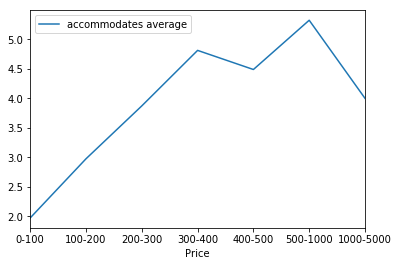

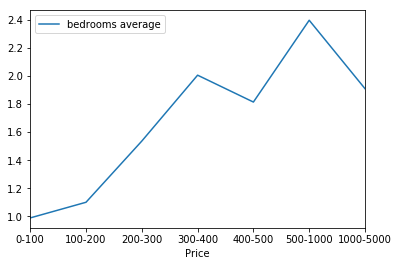

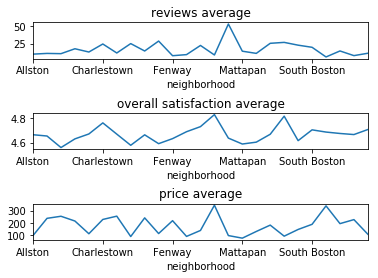

In [13]:
problem4 = problem3_sort_final.toPandas()
problem4.plot(x = 'Price', y='accommodates average')
problem4.plot(x = 'Price', y='bedrooms average')
subgraph = problem2_asc.toPandas()
figure, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.set_title("reviews average")
ax2.set_title("overall satisfaction average")
ax3.set_title("price average")
subgraph.plot(x='neighborhood', y='avg(reviews)', ax=ax1, legend=False)
subgraph.plot(x='neighborhood', y='avg(overall_satisfaction)', ax=ax2, legend=False)
subgraph.plot(x='neighborhood', y='avg(price)', ax=ax3, legend=False)
figure.subplots_adjust(hspace=1.5)

In [221]:
problem1_asc.toPandas().to_csv("./sorted_total_score_ascend.csv")
problem1_des.toPandas().to_csv("./sorted_total_score_descend.csv")
problem2_asc.toPandas().to_csv("./sorted_neighborhood_factors.csv")
problem3_sort_final.toPandas().to_csv("./sort_ranged_price.csv")